In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import linear_model, datasets

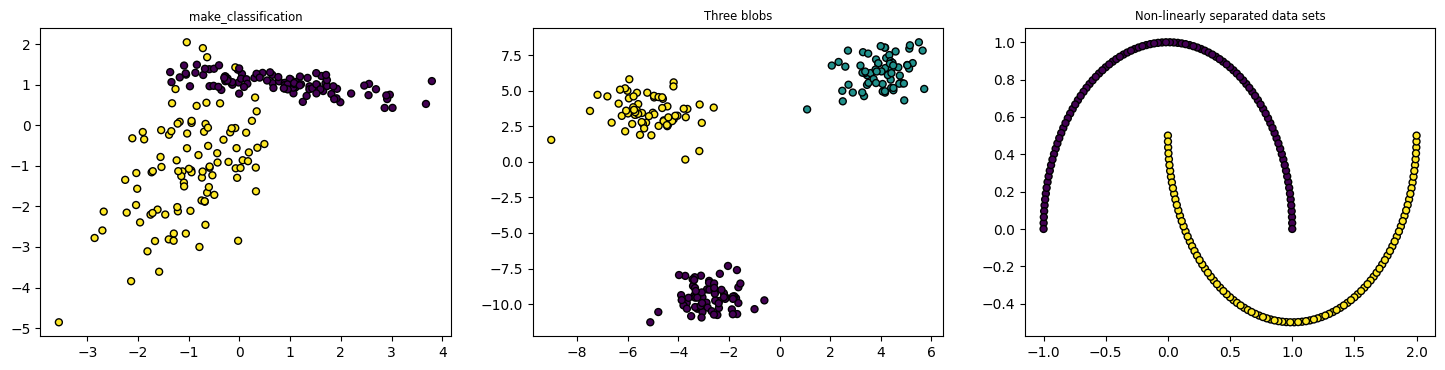

In [57]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("make_classification", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

plt.subplot(1,3,2)
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

plt.subplot(1,3,3)
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

plt.show()

In [58]:
def draw_boundry(X, Y, logreg):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

# 1. Logistic Regression

Accuracy 0.965
Accuracy 1.0


<ipython-input-58-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
<ipython-input-58-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


Accuracy 0.88


<ipython-input-58-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


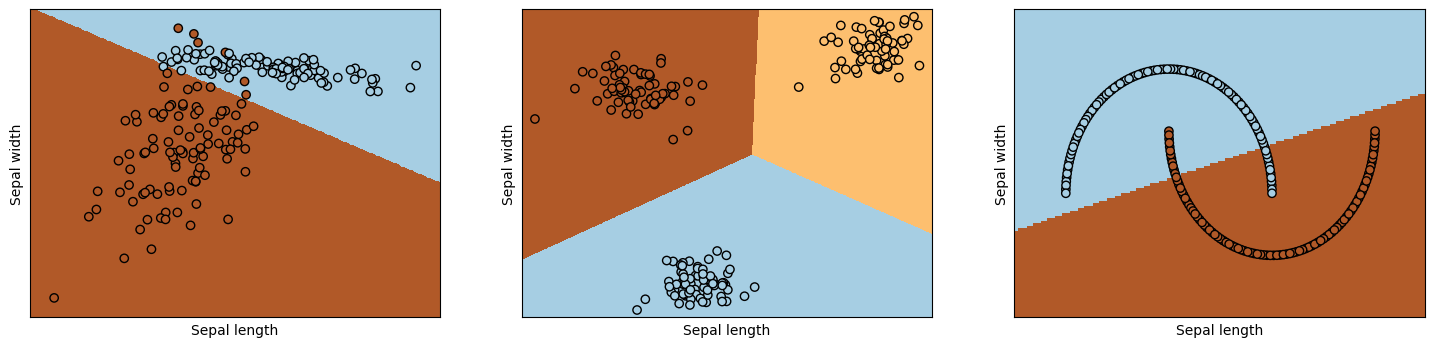

In [59]:
logreg = linear_model.LogisticRegression()

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
logreg.fit(X1, Y1)
print(f'Accuracy {logreg.score(X1, Y1)}')
draw_boundry(X1, Y1, logreg)

plt.subplot(1,3,2)
logreg.fit(X2, Y2)
print(f'Accuracy {logreg.score(X2, Y2)}')
draw_boundry(X2, Y2, logreg)

plt.subplot(1,3,3)
logreg.fit(X3, Y3)
print(f'Accuracy {logreg.score(X3, Y3)}')
draw_boundry(X3, Y3, logreg)

plt.show()

Logistic regression can well separate linear separable dataset like make_classification and three bomb, while for moon, it performes worse than other datasets.

# 2. KFold Cross Validation 

In [60]:
from sklearn.model_selection import KFold

In [61]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
logreg = linear_model.LogisticRegression()

In [62]:
def run_kf(kf, X, y, model):
    acc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        acc.append(model.score(X_test, y_test))
    print(f'Mean Acc: {np.array(acc).mean()}')

In [63]:
run_kf(kf, X1, Y1, logreg)
run_kf(kf, X2, Y2, logreg)
run_kf(kf, X3, Y3, logreg)

Mean Acc: 0.96
Mean Acc: 1.0
Mean Acc: 0.8699999999999999


Cross validationcan give a better estimation of model on dataset by making the evaluation process less biased.